### $^{32}{\rm Mg}$のスペクトルと密度
基底状態は2p2hですが、$0^+_2$, $0^+_3$ は、それぞれ4p4h, 0p0h.  

<img src="levels.png" width="50%">  

下記から plotするデータを選んで、proton, neutron, matter (p+n)の密度分布を描画します。
 
z軸に沿って積分した密度  
'Mg32_0p0h_i.dens' # 0p0h (3rd 0+)  
'Mg32_2p2h_i.dens' # 2p2h (1st 0+)  
'Mg32_4p4h_i.dens' # 4p4h (2nd 0+)  

z=0 の平面で切断した密度  
'Mg32_0p0h_s.dens' # 0p0h (3rd 0+)  
'Mg32_2p2h_s.dens' # 2p2h (1st 0+)  
'Mg32_4p4h_s.dens' # 4p4h (2nd 0+)  


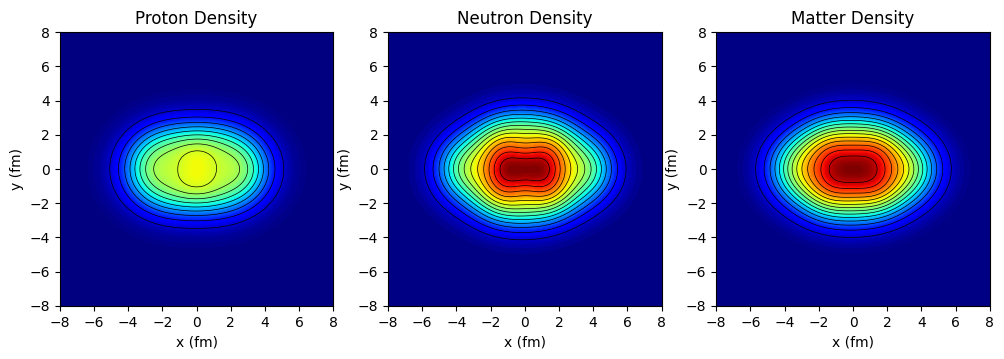

In [2]:
####################################################################################
# 下記からplotするデータを選ぶ
# filename = 'Mg32_0p0h_i.dens' # 0p0h (3rd 0+) density integrated over z axis
filename = 'Mg32_2p2h_i.dens' # 2p2h (1st 0+) density integrated over z axis
# filename = 'Mg32_4p4h_i.dens' # 4p4h (2nd 0+) density integrated over z axis
#  
# filename = 'Mg32_0p0h_s.dens' # 0p0h (3rd 0+) density sliced at z=0
# filename = 'Mg32_2p2h_s.dens' # 2p2h (1st 0+) density sliced at z=0
# filename = 'Mg32_4p4h_s.dens' # 4p4h (2nd 0+) density sliced at z=0
####################################################################################

# load density data from a file
# format of the file is: x y density_p density_n density_m
# where x, y are the coordinates of the point
import numpy as np
def load_density_data(filename):
    data = np.loadtxt(filename)
    return data

data = load_density_data(filename)

# transform the data into mesh grid format for plotting the contour map
x = data[:,0]
y = data[:,1]
density_p = data[:,2]
density_n = data[:,3]
density_m = data[:,4]

x = np.unique(x)
y = np.unique(y)
X, Y = np.meshgrid(x, y)
density_p = density_p.reshape(len(y), len(x))
density_n = density_n.reshape(len(y), len(x))
density_m = density_m.reshape(len(y), len(x))


# plot contour map of proton, neutron and matter densities
# keeping aspect ratio 1:1 for each plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# set contour levels
vmin = 0.0
vmax_n = np.max(density_n)
lev_n = np.linspace(vmin, vmax_n, 16)
vmax_m = np.max(density_m)
lev_m = np.linspace(vmin, vmax_m, 16)

ax0 = plt.subplot(gs[0])
ax0.contour(X, Y, density_p,levels=lev_n, colors='black')
ax0.contourf(X, Y, density_p, levels=100, vmin=vmin, vmax=vmax_n, cmap='jet')
ax0.set_aspect('equal')
ax0.set_title('Proton Density')

ax1 = plt.subplot(gs[1])
ax1.contour(X, Y, density_n, levels=lev_n, colors='black')
ax1.contourf(X, Y, density_n, levels=100, vmin=vmin, vmax=vmax_n, cmap='jet')
ax1.set_aspect('equal')
ax1.set_title('Neutron Density')

ax2 = plt.subplot(gs[2])
ax2.set_aspect('equal')
ax2.set_title('Matter Density')
ax2.contour(X, Y, density_m, levels=lev_m, colors='black')
ax2.contourf(X, Y, density_m, levels=100, vmin=vmin, vmax=vmax_m, cmap='jet')

# set line width thicker
for ax in [ax0, ax1, ax2]:
    for c in ax.collections:
        c.set_linewidth(0.5)

# set x, y range from -8 to 8
for ax in [ax0, ax1, ax2]:
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)

# set x, y labels
for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('x (fm)')
    ax.set_ylabel('y (fm)')

# set x, y tickers to be integers
for ax in [ax0, ax1, ax2]:
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

